In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv('../preprocessing/output.csv')
df.head()

,Unnamed: 0,name,city,locality,cuisines,average_cost_for_two,aggregate_rating,rating_text,votes,photo_count,encoded_cuisines,cluster_label,cluster
0,0,Bikanervala,Agra,Khandari,"North Indian, South Indian, Mithai, Street Foo...",700,4.4,Very Good,814,154,[2 3 1 4 0],0,2
1,1,Mama Chicken Mama Franky House,Agra,Agra Cantt,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...",600,4.4,Very Good,1203,161,[3 2 4 0 1 5],0,2
2,2,Bhagat Halwai,Agra,Shahganj,"Fast Food, Mithai",300,4.2,Very Good,801,107,[0 1],0,2
3,3,Bhagat Halwai,Agra,Civil Lines,"Desserts, Bakery, Fast Food, South Indian",300,4.3,Very Good,693,157,[1 0 2 3],0,2
4,4,The Salt Cafe Kitchen & Bar,Agra,Tajganj,"North Indian, Continental, Italian",1000,4.9,Excellent,470,291,[2 0 1],2,2


In [3]:
df = df.drop(['cluster_label','cluster'],axis = 1)
df.head()

,Unnamed: 0,name,city,locality,cuisines,average_cost_for_two,aggregate_rating,rating_text,votes,photo_count,encoded_cuisines
0,0,Bikanervala,Agra,Khandari,"North Indian, South Indian, Mithai, Street Foo...",700,4.4,Very Good,814,154,[2 3 1 4 0]
1,1,Mama Chicken Mama Franky House,Agra,Agra Cantt,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...",600,4.4,Very Good,1203,161,[3 2 4 0 1 5]
2,2,Bhagat Halwai,Agra,Shahganj,"Fast Food, Mithai",300,4.2,Very Good,801,107,[0 1]
3,3,Bhagat Halwai,Agra,Civil Lines,"Desserts, Bakery, Fast Food, South Indian",300,4.3,Very Good,693,157,[1 0 2 3]
4,4,The Salt Cafe Kitchen & Bar,Agra,Tajganj,"North Indian, Continental, Italian",1000,4.9,Excellent,470,291,[2 0 1]


In [4]:
df['num_cuisines'] = df['cuisines'].apply(lambda x: len(x.split(',')))

# Display the DataFrame with the new 'num_cuisines' column
df.head()

,Unnamed: 0,name,city,locality,cuisines,average_cost_for_two,aggregate_rating,rating_text,votes,photo_count,encoded_cuisines,num_cuisines
0,0,Bikanervala,Agra,Khandari,"North Indian, South Indian, Mithai, Street Foo...",700,4.4,Very Good,814,154,[2 3 1 4 0],5
1,1,Mama Chicken Mama Franky House,Agra,Agra Cantt,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...",600,4.4,Very Good,1203,161,[3 2 4 0 1 5],6
2,2,Bhagat Halwai,Agra,Shahganj,"Fast Food, Mithai",300,4.2,Very Good,801,107,[0 1],2
3,3,Bhagat Halwai,Agra,Civil Lines,"Desserts, Bakery, Fast Food, South Indian",300,4.3,Very Good,693,157,[1 0 2 3],4
4,4,The Salt Cafe Kitchen & Bar,Agra,Tajganj,"North Indian, Continental, Italian",1000,4.9,Excellent,470,291,[2 0 1],3


In [5]:
df = df.drop('encoded_cuisines',axis=1)
df.head()

,Unnamed: 0,name,city,locality,cuisines,average_cost_for_two,aggregate_rating,rating_text,votes,photo_count,num_cuisines
0,0,Bikanervala,Agra,Khandari,"North Indian, South Indian, Mithai, Street Foo...",700,4.4,Very Good,814,154,5
1,1,Mama Chicken Mama Franky House,Agra,Agra Cantt,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...",600,4.4,Very Good,1203,161,6
2,2,Bhagat Halwai,Agra,Shahganj,"Fast Food, Mithai",300,4.2,Very Good,801,107,2
3,3,Bhagat Halwai,Agra,Civil Lines,"Desserts, Bakery, Fast Food, South Indian",300,4.3,Very Good,693,157,4
4,4,The Salt Cafe Kitchen & Bar,Agra,Tajganj,"North Indian, Continental, Italian",1000,4.9,Excellent,470,291,3


applying Kmeans clustering on votes and number_of_cuisines to get an idea or relation

In [35]:
from sklearn.cluster import KMeans
X = df[['num_cuisines', 'votes']]

# Initialize the KMeans model
kmeans = KMeans(n_clusters=4, random_state=0)

# Fit the model
kmeans.fit(X)

# Add the cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

# Display the DataFrame with the cluster labels
df.head()

,Unnamed: 0,name,city,locality,cuisines,average_cost_for_two,aggregate_rating,rating_text,votes,photo_count,num_cuisines,cluster
0,0,Bikanervala,Agra,Khandari,"North Indian, South Indian, Mithai, Street Foo...",700,4.4,Very Good,814,154,5,1
1,1,Mama Chicken Mama Franky House,Agra,Agra Cantt,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...",600,4.4,Very Good,1203,161,6,1
2,2,Bhagat Halwai,Agra,Shahganj,"Fast Food, Mithai",300,4.2,Very Good,801,107,2,1
3,3,Bhagat Halwai,Agra,Civil Lines,"Desserts, Bakery, Fast Food, South Indian",300,4.3,Very Good,693,157,4,1
4,4,The Salt Cafe Kitchen & Bar,Agra,Tajganj,"North Indian, Continental, Italian",1000,4.9,Excellent,470,291,3,3


In [37]:
cluster_counts = df['cluster'].value_counts()
cluster_counts

cluster
3    49469
1     5533
0     1072
2      111
Name: count, dtype: int64

we got around 50000 data points in a single cluster when we applies k means on  2 , 3 , 4
so we choose the largest as other data points contain around 100 - 1000 values which is a small fraction and this skews the results

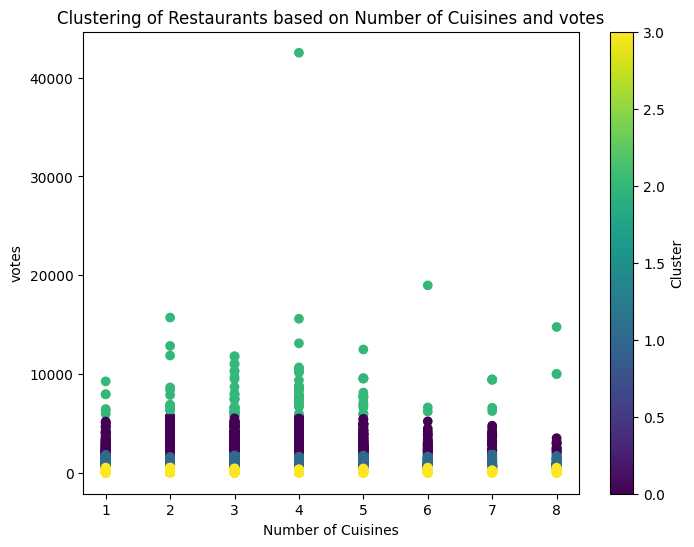

In [38]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['num_cuisines'], df['votes'], c=df['cluster'], cmap='viridis')
plt.xlabel('Number of Cuisines')
plt.ylabel('votes')
plt.title('Clustering of Restaurants based on Number of Cuisines and votes')
plt.colorbar(label='Cluster')
plt.show()

from the 2 clusters we try to find the relation between those features and average_cost_for_two

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Filter data for cluster 3
cluster3 = df[df['cluster'] == 3]

# Split data for cluster 3
X_cluster3 = cluster3[['num_cuisines', 'votes']]
y_cluster3 = cluster3['aggregate_rating']
X_cluster3_train, X_cluster3_test, y_cluster3_train, y_cluster3_test = train_test_split(X_cluster3, y_cluster3, test_size=0.2, random_state=42)

# Random Forest Regressor for cluster 3
model_cluster3 = RandomForestRegressor().fit(X_cluster3_train, y_cluster3_train)

# Make predictions for cluster 3
y_pred_cluster3 = model_cluster3.predict(X_cluster3_test)

# Calculate Mean Squared Error (MSE) and R-squared for cluster 3
mse_cluster3 = mean_squared_error(y_cluster3_test, y_pred_cluster3)
r2_cluster3 = r2_score(y_cluster3_test, y_pred_cluster3)

print("Cluster 3:")
print("  Mean Squared Error (MSE):", mse_cluster3)
print("  R-squared:", r2_cluster3)


Cluster 3:
  Mean Squared Error (MSE): 0.2575750421299619
  R-squared: 0.883573228199256


In [41]:
X = df[['num_cuisines', 'votes', 'average_cost_for_two']]

# Initialize the KMeans model
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the model
kmeans.fit(X)

# Add the cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

df.head()


,Unnamed: 0,name,city,locality,cuisines,average_cost_for_two,aggregate_rating,rating_text,votes,photo_count,num_cuisines,cluster
0,0,Bikanervala,Agra,Khandari,"North Indian, South Indian, Mithai, Street Foo...",700,4.4,Very Good,814,154,5,1
1,1,Mama Chicken Mama Franky House,Agra,Agra Cantt,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...",600,4.4,Very Good,1203,161,6,1
2,2,Bhagat Halwai,Agra,Shahganj,"Fast Food, Mithai",300,4.2,Very Good,801,107,2,1
3,3,Bhagat Halwai,Agra,Civil Lines,"Desserts, Bakery, Fast Food, South Indian",300,4.3,Very Good,693,157,4,1
4,4,The Salt Cafe Kitchen & Bar,Agra,Tajganj,"North Indian, Continental, Italian",1000,4.9,Excellent,470,291,3,1


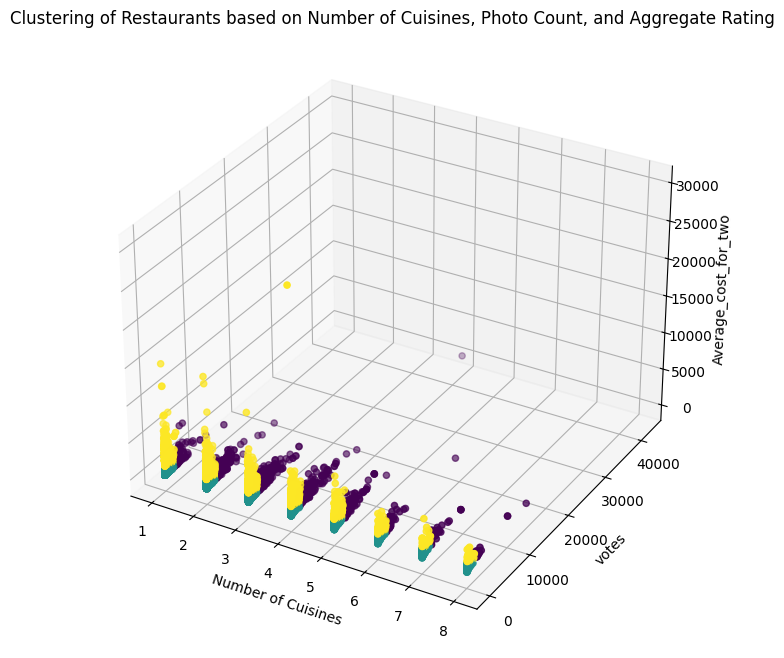

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['num_cuisines'], df['votes'], df['average_cost_for_two'], c=df['cluster'], cmap='viridis')
ax.set_xlabel('Number of Cuisines')
ax.set_ylabel('votes')
ax.set_zlabel('Average_cost_for_two')
ax.set_title('Clustering of Restaurants based on Number of Cuisines, Photo Count, and Aggregate Rating')
plt.show()


In [43]:
cluster_counts = df['cluster'].value_counts()
cluster_counts

cluster
1    49830
2     5115
0     1240
Name: count, dtype: int64

we again see that one cluster has the overWhelming majority of points so we consider only that cluster


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Filter data for cluster 1
cluster1 = df[df['cluster'] == 1]

X = cluster1[['average_cost_for_two', 'votes', 'num_cuisines']]
y = cluster1['aggregate_rating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the decision tree regressor
model = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Decision Tree Regressor for Cluster 1:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Decision Tree Regressor for Cluster 1:
Mean Squared Error: 0.3334774882292143
R-squared: 0.8470064888573312


Applying Random forest Regressor to get relationship between the above three features and target

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Filter data for cluster 1
cluster1 = df[df['cluster'] == 1]

X = cluster1[['average_cost_for_two', 'votes', 'num_cuisines']]
y = cluster1['aggregate_rating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the random forest regressor
model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor for Cluster 1:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Random Forest Regressor for Cluster 1:
Mean Squared Error: 0.29195054647070706
R-squared: 0.8660583074984869


Applying gradient booster under classification between the features to get accuracy

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Filter data for cluster 1
cluster1 = df[df['cluster'] == 1]

X = cluster1[['average_cost_for_two', 'votes', 'num_cuisines']]
y = cluster1['aggregate_rating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the gradient boosting regressor
model = GradientBoostingRegressor(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Regressor for Cluster 1:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Gradient Boosting Regressor for Cluster 1:
Mean Squared Error: 0.2665058580588292
R-squared: 0.8777318757526313


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Filter data for cluster 1
cluster1 = df[df['cluster'] == 1]

X = cluster1[['average_cost_for_two', 'votes', 'num_cuisines']]
y = cluster1['aggregate_rating']

# Convert 'aggregate_rating' into classes (e.g., high, medium, low) for classification
# For simplicity, let's assume two classes: 'popular' and 'not popular' based on a threshold
threshold = 3.5  # Define the threshold for 'popular' vs 'not popular'
y = ['popular' if rating >= threshold else 'not popular' for rating in y]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the KNN classifier
model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8411462514047199
Classification Report:
              precision    recall  f1-score   support

 not popular       0.86      0.83      0.85      6530
     popular       0.82      0.86      0.84      5928

    accuracy                           0.84     12458
   macro avg       0.84      0.84      0.84     12458
weighted avg       0.84      0.84      0.84     12458



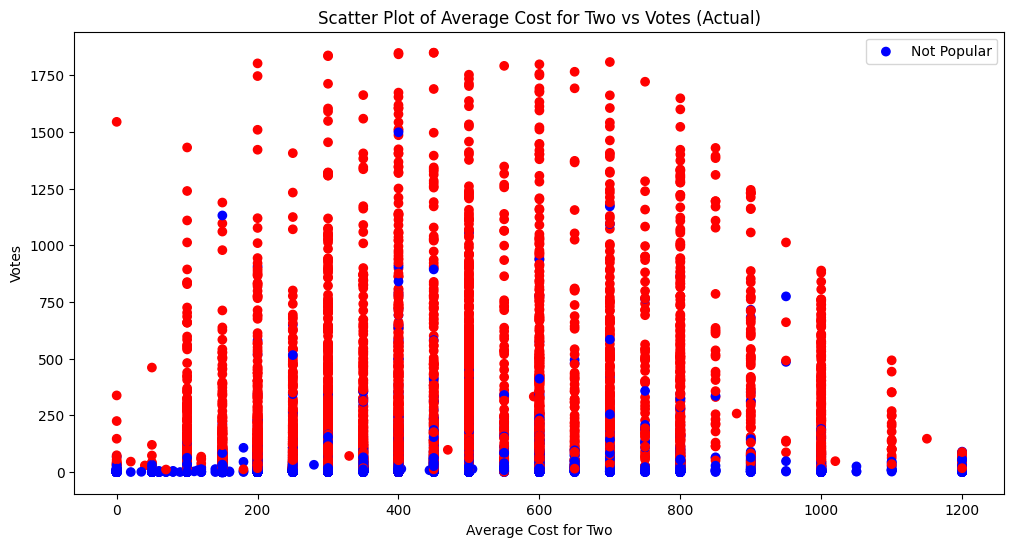

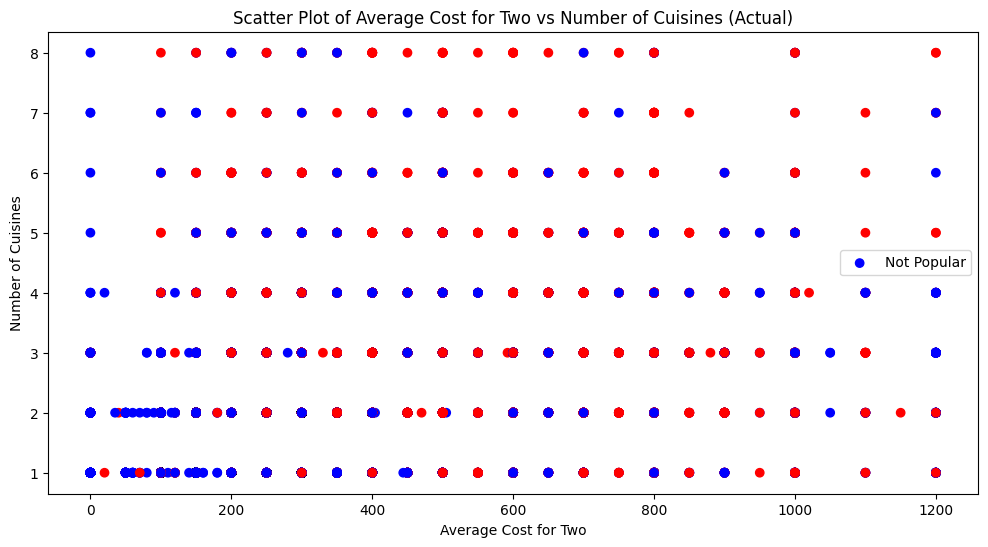

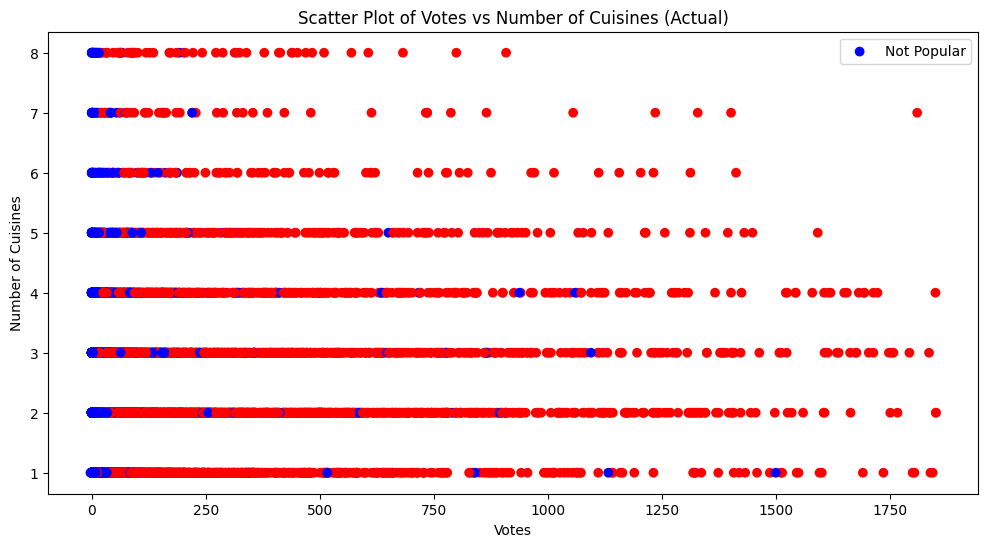

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot for 'average_cost_for_two' vs 'votes', coloring points based on classification
plt.figure(figsize=(12, 6))
plt.scatter(X_test['average_cost_for_two'], X_test['votes'], c=np.where(np.array(y_test)=='popular', 'red', 'blue'), label='Actual')
plt.xlabel('Average Cost for Two')
plt.ylabel('Votes')
plt.title('Scatter Plot of Average Cost for Two vs Votes (Actual)')
plt.legend(['Not Popular', 'Popular'])
plt.show()

# Create a scatter plot for 'average_cost_for_two' vs 'num_cuisines', coloring points based on classification
plt.figure(figsize=(12, 6))
plt.scatter(X_test['average_cost_for_two'], X_test['num_cuisines'], c=np.where(np.array(y_test)=='popular', 'red', 'blue'), label='Actual')
plt.xlabel('Average Cost for Two')
plt.ylabel('Number of Cuisines')
plt.title('Scatter Plot of Average Cost for Two vs Number of Cuisines (Actual)')
plt.legend(['Not Popular', 'Popular'])
plt.show()

# Create a scatter plot for 'votes' vs 'num_cuisines', coloring points based on classification
plt.figure(figsize=(12, 6))
plt.scatter(X_test['votes'], X_test['num_cuisines'], c=np.where(np.array(y_test)=='popular', 'red', 'blue'), label='Actual')
plt.xlabel('Votes')
plt.ylabel('Number of Cuisines')
plt.title('Scatter Plot of Votes vs Number of Cuisines (Actual)')
plt.legend(['Not Popular', 'Popular'])
plt.show()


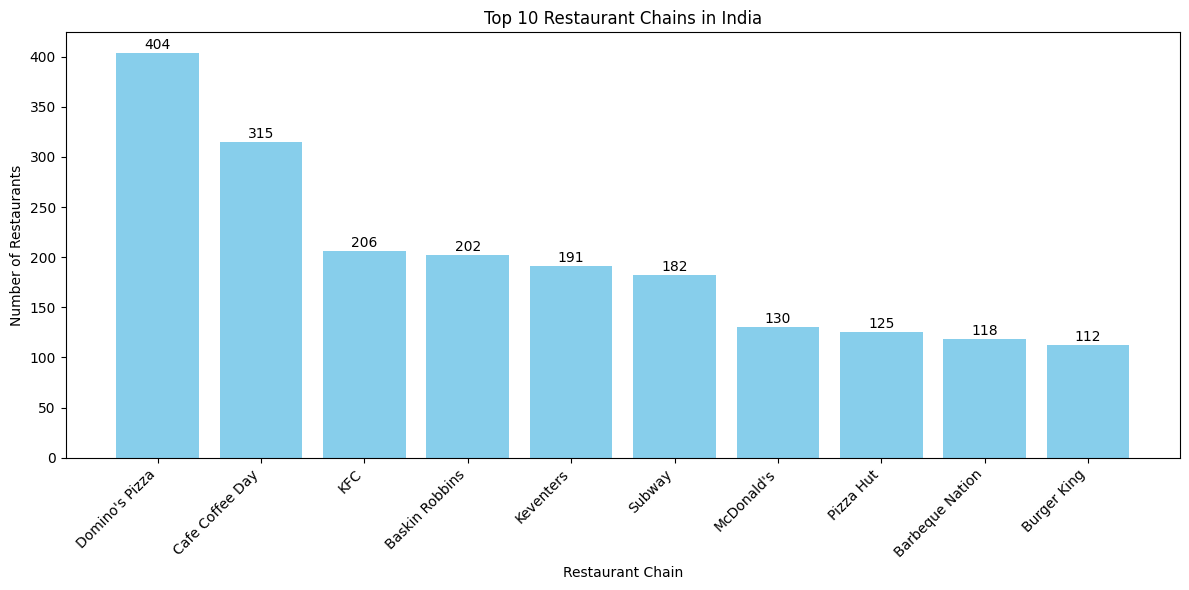

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame containing restaurant data
# Let's say the column 'name' contains the names of the restaurants
# and 'chain' contains the chain information

# Group the data by restaurant chain and count the number of occurrences
chain_counts = df.groupby('name').size().sort_values(ascending=False)

# Select the top 10 chains
top_10_chains = chain_counts.head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_chains.index, top_10_chains.values, color='skyblue')
plt.xlabel('Restaurant Chain')
plt.ylabel('Number of Restaurants')
plt.title('Top 10 Restaurant Chains in India')
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom')

plt.tight_layout()
plt.show()



This code above shows relation and accuracy of relation between num_cuisines , average_cost_for_two , votes and aggregate_rating